In [1]:

import pandas as pd

url = 'http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=178402512&tvd=27820001217443&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217443&type=222'
page = pd.read_html(url, encoding = 'cp1251')[7].drop(12).T
header = ['Номер УИК','Количество избирателей','% явки','% за Амосова','% за Беглова','% за Тихонову']
table = [[None for i in range(page.shape[0])]for j in range(6)]
table = pd.DataFrame(table).T
header = pd.DataFrame(header).T.iloc[0]
table = table.rename(columns = header)

for i in range(page.shape[0]):
    table.iloc[i,0] = page.iloc[i,0] #номер УИК
    table.iloc[i,1] = int(page.iloc[i,1]) #колчество избирателей
    table.iloc[i,2] = round((int(page.iloc[i,3])+int(page.iloc[i,4]))*100/int(page.iloc[i,1]),2) #процент явки
    for j in range(3,6):
        table.iloc[i,j] = float(page.iloc[i,j+9].split()[1].split("%")[0]) #процент голосов за кадидатов
table

,Номер УИК,Количество избирателей,% явки,% за Амосова,% за Беглова,% за Тихонову
0,УИК №973,1874,27.75,10.19,67.88,19.42
1,УИК №974,1894,24.71,12.18,66.03,19.66
2,УИК №975,1649,24.68,11.85,63.95,21.98
3,УИК №976,2346,28.86,16.1,62.92,19.2
4,УИК №977,1803,29.28,13.83,65.72,16.86
...,...,...,...,...,...,...
70,УИК №1043,1631,24.65,18.66,56.47,20.9
71,УИК №1044,1454,26,11.11,69.58,16.93
72,УИК №1045,2398,31.23,9.81,66.62,20.71
73,УИК №1046,2291,32.34,11.34,64.91,21.05


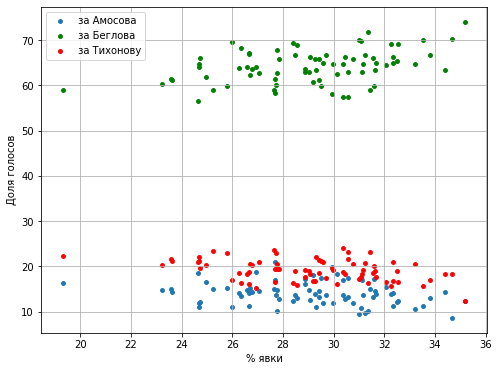

In [5]:
import matplotlib.pyplot as plt

#Зависимость доли голосов от явки

plt.figure(figsize=(8, 6))
plt.scatter(table.iloc[:,2],table.iloc[:,3], s = 15, label = 'за Амосова')
plt.scatter(table.iloc[:,2],table.iloc[:,4], s = 15, label = 'за Беглова', c = 'g')
plt.scatter(table.iloc[:,2],table.iloc[:,5], s = 15, label = 'за Тихонову', c = 'r')
plt.ylabel('Доля голосов')
plt.xlabel('% явки')
plt.legend()
plt.grid()
plt.show()

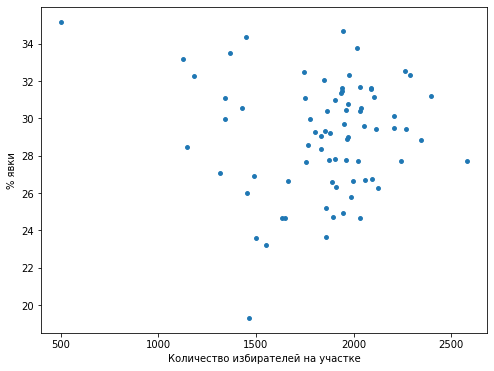

In [3]:
#Зависимость явки от количества избирателей на участке

plt.figure(figsize=(8, 6))
plt.scatter(table.iloc[:,1],table.iloc[:,2], s = 15)
plt.ylabel('% явки')
plt.xlabel('Количество избирателей на участке')
plt.show()

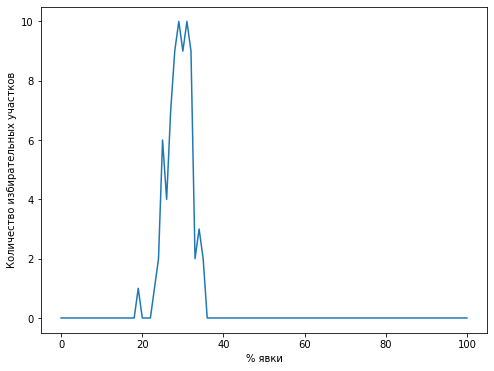

In [4]:
import numpy as np

#Зависимость явки и количества избирательных участков

number = [0 for i in range(101)]
for i in table.iloc[:,2]:
    for j in range(101):
        if(((j - 0.5) < i) & (i <= (j + 0.5))):
            number[j]+=1;
            
x = np.arange(101)
plt.figure(figsize=(8, 6))
plt.plot(x, number)
plt.ylabel('Количество избирательных участков')
plt.xlabel('% явки')
plt.show()
